<a href="https://colab.research.google.com/github/Risotto04/DATA-ENGINEERING-LAB/blob/main/LAB1/LAB01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import datetime as dt
import numpy
import pandas as pd

In [ ]:
#1. (1 คะแนน) จงเขียนโปรแกรมภาษาไพธอนเพื่อสร้างไฟล์ student.csv
# tuple โดยกำหนดให้มี header= ("student_id", "name", "gpax", "major", "dob")
# และทำการใส่ข้อมูลของนักศึกษา 5 คน ที่เก็บไว้ใน list ของ tuple โดยให้นักศึกษากำหนดค่าเอง
header= ("student_id", "name", "gpax", "major", "dob")
data= [  ("B6419936", "Theerachot", 5.0, "CPE", dt.date(2002,12,5)),
         ("B6419937", "A", 2.00, "EE", dt.date(2002,12,6)),
         ("B6419938", "B", 1.00, "CPE", dt.date(2002,12,7)),
         ("B6419939", "C", 4.00, "CPE", dt.date(2002,12,8)),
         ("B6419940", "D", 3.50, "CPE", dt.date(2002,12,9))]

In [ ]:
# write
with open('student.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(data)

In [ ]:
#2. ให้ทำการอ่านไฟล์ student.csv ที่นักศึกษาทำการบันทึกไว้ จากนั้นให้แสดงผลลัพธ์ต่อไปนี้:
#
#2.1 (1 คะแนน) เขียนโปรแกรมแสดงข้อมูลที่อ่านได้.
#2.2 (1 คะแนน) เขียนโปรแกรมเพื่อหาว่ามีจำนวนนักศึกษากี่คน (ไม่รวม Header)
#2.3 (1 คะแนน) เขียนโปรแกรมเพื่อหาว่า GPAX เฉลี่ยของนักศึกษาทั้งหมดเท่าไร
#2.4 (1 คะแนน) เขียนโปรแกรมเพื่อหาว่า GPAX ของใครมีค่าสูงที่สุดและใครมีค่าต่ำที่สุด
GPAX = []
student=[]
with open('student.csv', encoding="utf8") as f:
    csv_reader = csv.DictReader(f)
    # calculate total
    for line in csv_reader:
        student.append(line['name'])
        GPAX.append(float(line['gpax']))
print(f"มีจำนวนนักศึกษา {len(student)}")
print(f"เฉลี่ยของนักศึกษาทั้งหมดคือ %.2f",numpy.average(GPAX))
print(f"ค่าสูงที่สุด {student[GPAX.index(max(GPAX))]}")
print(f"ค่าต่ำที่สุด {student[GPAX.index(min(GPAX))]}")

มีจำนวนนักศึกษา 5
เฉลี่ยของนักศึกษาทั้งหมดคือ %.2f 3.1
ค่าสูงที่สุด Theerachot
ค่าต่ำที่สุด B


In [ ]:
#2. (1 คะแนน) อ่านไฟล์ csv นี้ เก็บไว้ที่ตัวแปร penguin และแสดงข้อมูลเฉพาะส่วนหัวของข้อมูล (head)
penguin = pd.read_csv("/content/penguins.csv")
penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
#3. แสดงรายละเอียดของข้อมูลนี้ โดยใช้คำสั่ง info()
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
#4. (1 คะแนน) เลือกข้อมูลออกมาเฉพาะคอลัม island และ body_mass_g
#โดยเลือกเฉพาะข้อมูลที่มีค่า body_mass_g มากกว่า 6000 เท่านั้น โดยให้เก็บไว้ที่ตัวแปรชื่อว่า data1
data1 = penguin.loc[(penguin['body_mass_g']>6000),["island","body_mass_g"]]
data1

,island,body_mass_g
237,Biscoe,6300.0
253,Biscoe,6050.0


In [ ]:
data1.shape

(2, 2)

In [ ]:
#6. (1 คะแนน) เลือกข้อมูลออกมาเฉพาะคอลัมน์ species, bill_length_mm, bill_depth_mm, และ flipper_length_mm โดยเลือกเฉพาะข้อมูลที่มีค่า species เป็น Adelie และ Chinstrap เท่านั้น โดยให้เก็บไว้ที่ตัวแปรชื่อว่า data2
data2 = penguin.loc[(penguin['species'] == "Adelie" ) | (penguin['species'] == "Chinstrap"),["species","bill_length_mm","bill_depth_mm","flipper_length_mm"]]
data2

# data2 = myTable[myTable['nameColumn'].isin(['value1', 'value1'])][['column5', 'column4','column3', 'column4']]

,species,bill_length_mm,bill_depth_mm,flipper_length_mm
0,Adelie,39.1,18.7,181.0
1,Adelie,39.5,17.4,186.0
2,Adelie,40.3,18.0,195.0
3,Adelie,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0
...,...,...,...,...
215,Chinstrap,55.8,19.8,207.0
216,Chinstrap,43.5,18.1,202.0
217,Chinstrap,49.6,18.2,193.0
218,Chinstrap,50.8,19.0,210.0


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

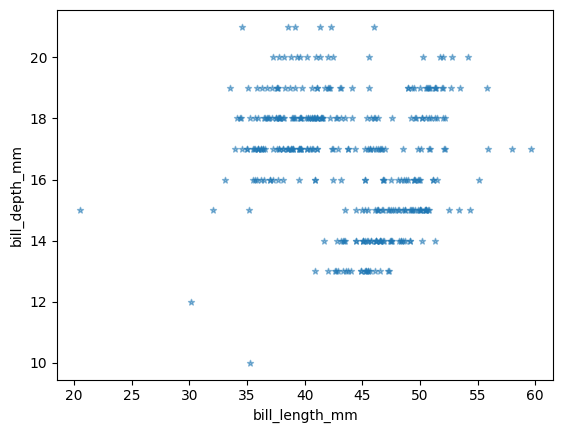

In [ ]:
#7. จงเขียนคำสั่งสร้างกราฟ Scatter ของ bill_length_mm (แกน X) , bill_depth_mm (แกน Y) ตามคำสั่งนี้:
#penguin.plot.scatter(x="bill_length_mm", y="bill_depth_mm", alpha=0.5)
penguin.plot.scatter(x="bill_length_mm", y="bill_depth_mm", alpha=0.5,marker="*")

In [ ]:
#7. จงเขียนคำสั่งสร้างกราฟ Scatter ของ bill_length_mm (แกน X) , bill_depth_mm (แกน Y) ตามคำสั่งนี้:
#penguin.plot.scatter(x="bill_length_mm", y="bill_depth_mm", alpha=0.5)
penguin[["bill_length_mm","bill_depth_mm"]].plot(style='__')

In [ ]:
data2.to_csv("/content/new_data2.csv")

In [ ]:
#2. (1 คะแนน) ทำการเพิ่มข้อมูลใหม่โดยใช้คำสั่ง append
penguin = pd.read_csv("/content/penguins.csv")
add_data=pd.DataFrame(
    {
        "species":["Gentoo","Chinstrap","Adelie"],
        "island":["Dream","Torgersen","Biscoe"],
        "bill_length_mm":[20.5,35.25,30.15],
        "bill_depth_mm":[15.25,10,12.65],
        "flipper_length_mm":[150,180,165],
        "body_mass_g":[3510,2500,400],
        "sex":["MALE","FEMALE","MALE"],
    }
)
penguin_add = penguin.append(add_data)
penguin_add

<ipython-input-326-057c60a66785>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  penguin_add = penguin.append(add_data)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.70,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.40,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.00,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.70,19.30,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
342,Gentoo,Biscoe,45.20,14.80,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.90,16.10,213.0,5400.0,MALE
0,Gentoo,Dream,20.50,15.25,150.0,3510.0,MALE
1,Chinstrap,Torgersen,35.25,10.00,180.0,2500.0,FEMALE


In [ ]:
#3. (1 คะแนน) ให้สร้าง list ของตัวเลขตั้งแต่ 1 ถึงจำนวนข้อมูลใน penguin เพื่อนำมาสร้างเป็น index จากนั้นให้ทำการเพิ่มคอลัมใหม่ใน
# penguin โดยกำหนดให้ชื่อคอลัมคือ id และทำการ set_index ให้กับ id นับแต่ตัวแรกเป็น 1 ส่วนข้อมูลต่อไปนับต่อจากนั้น
penguin_add['id'] = range(1, len(penguin_add) + 1)
penguin_add.set_index('id', inplace=True)
penguin_add

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
id,,,,,,,
1,Adelie,Torgersen,39.10,18.70,181.0,3750.0,MALE
2,Adelie,Torgersen,39.50,17.40,186.0,3800.0,FEMALE
3,Adelie,Torgersen,40.30,18.00,195.0,3250.0,FEMALE
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
5,Adelie,Torgersen,36.70,19.30,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
343,Gentoo,Biscoe,45.20,14.80,212.0,5200.0,FEMALE
344,Gentoo,Biscoe,49.90,16.10,213.0,5400.0,MALE
345,Gentoo,Dream,20.50,15.25,150.0,3510.0,MALE


In [ ]:
#4. (1 คะแนน) ทำการเพิ่มคอลัมชื่อ body_mass_kg โดยเป็นการนำค่าใน body_mass_g มาหารด้วย 1000
penguin_add['body_mass_kg']=penguin_add["body_mass_g"]/1000
penguin_add.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,body_mass_kg
id,,,,,,,,
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,3.75
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,3.80
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,3.25


In [ ]:
#5. ให้ทำการเปลี่ยนชื่อคอลัมจาก sex เป็น gender
penguin_add=penguin_add.rename(columns={"sex":"gender"})
penguin_add.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,body_mass_kg
id,,,,,,,,
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,3.75
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,3.80
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,3.25


In [ ]:
#6. อธิบายค่าทางสถิติของ penguin ด้วยคำสั่ง describe()
penguin_add.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,body_mass_kg
count,345.000000,345.000000,345.000000,345.000000,345.000000
mean,43.788986,17.111884,200.602899,4183.797101,4.183797
std,5.647484,2.020474,14.438381,830.074730,0.830075
min,20.500000,10.000000,150.000000,400.000000,0.400000
25%,39.200000,15.500000,190.000000,3550.000000,3.550000
50%,44.100000,17.300000,197.000000,4000.000000,4.000000
75%,48.500000,18.700000,213.000000,4750.000000,4.750000
max,59.600000,21.500000,231.000000,6300.000000,6.300000


In [ ]:
#7. (1 คะแนน) หาค่า mean ของ gender โดยใช้คำสั่ง groupby()
penguin_add.groupby('gender').mean()

<ipython-input-331-f173e2f63487>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  penguin_add.groupby('gender').mean()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,body_mass_kg
gender,,,,,
FEMALE,42.055723,16.386747,197.259036,3854.066265,3.854066
MALE,45.613235,17.844706,203.952941,4515.205882,4.515206


In [ ]:
#8. หาว่าในคอลัม species มีจำนวนข้อมูลในแต่ละค่ากี่ตัว โดยใช้คำสั่ง value_counts()
penguin_add.value_counts('species')

species
Adelie       153
Gentoo       125
Chinstrap     69
dtype: int64

In [ ]:
#9. ให้แสดงข้อมูลของคอลัม body_mass_g โดยให้เรียงลำดับจากมากไปน้อยด้วยคำสั่ง sort_values()
penguin_add.sort_values('body_mass_g',ascending=False)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,body_mass_kg
id,,,,,,,,
238,Gentoo,Biscoe,49.20,15.20,221.0,6300.0,MALE,6.30
254,Gentoo,Biscoe,59.60,17.00,230.0,6050.0,MALE,6.05
298,Gentoo,Biscoe,51.10,16.30,220.0,6000.0,MALE,6.00
338,Gentoo,Biscoe,48.80,16.20,222.0,6000.0,MALE,6.00
300,Gentoo,Biscoe,45.20,16.40,223.0,5950.0,MALE,5.95
...,...,...,...,...,...,...,...,...
191,Chinstrap,Dream,46.90,16.60,192.0,2700.0,FEMALE,2.70
346,Chinstrap,Torgersen,35.25,10.00,180.0,2500.0,FEMALE,2.50
347,Adelie,Biscoe,30.15,12.65,165.0,400.0,MALE,0.40


In [ ]:
new_penguin = pd.concat([penguin,penguin,penguin,penguin,penguin], axis=0)
new_penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
#ให้แสดงข้อมูลของ id ที่ 10, 20, 30 โดยใช้คำสั่ง loc
penguin_add.loc[[10,20,30]]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,body_mass_kg
id,,,,,,,,
10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,4.25
20,Adelie,Torgersen,46.0,21.5,194.0,4200.0,MALE,4.20
30,Adelie,Biscoe,40.5,18.9,180.0,3950.0,MALE,3.95


In [ ]:
penguin_add.to_csv("/content/new_penguins.csv")

In [ ]:
penguin = pd.read_csv("/content/new_penguins.csv",index_col=0)
penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,body_mass_kg
id,,,,,,,,
1,Adelie,Torgersen,39.10,18.70,181.0,3750.0,MALE,3.75
2,Adelie,Torgersen,39.50,17.40,186.0,3800.0,FEMALE,3.80
3,Adelie,Torgersen,40.30,18.00,195.0,3250.0,FEMALE,3.25
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
5,Adelie,Torgersen,36.70,19.30,193.0,3450.0,FEMALE,3.45
...,...,...,...,...,...,...,...,...
343,Gentoo,Biscoe,45.20,14.80,212.0,5200.0,FEMALE,5.20
344,Gentoo,Biscoe,49.90,16.10,213.0,5400.0,MALE,5.40
345,Gentoo,Dream,20.50,15.25,150.0,3510.0,MALE,3.51


In [ ]:
#2. (1 คะแนน) ทำการลบแถวที่มีค่าว่างด้วยคำสั่ง dropna() และใช้คำสั่ง to_string() ในการแสดงผล
print(penguin.dropna().head(10).to_string())

   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  body_mass_kg
id                                                                                                        
1   Adelie  Torgersen            39.1           18.7              181.0       3750.0    MALE         3.750
2   Adelie  Torgersen            39.5           17.4              186.0       3800.0  FEMALE         3.800
3   Adelie  Torgersen            40.3           18.0              195.0       3250.0  FEMALE         3.250
5   Adelie  Torgersen            36.7           19.3              193.0       3450.0  FEMALE         3.450
6   Adelie  Torgersen            39.3           20.6              190.0       3650.0    MALE         3.650
7   Adelie  Torgersen            38.9           17.8              181.0       3625.0  FEMALE         3.625
8   Adelie  Torgersen            39.2           19.6              195.0       4675.0    MALE         4.675
13  Adelie  Torgersen            41.1

In [ ]:
#3. (1 คะแนน) จาก penguin เดิม ให้ทำการแทนที่ค่าว่างด้วยค่าเฉลี่ยถ้าเป็นคอลัมที่เป็น numeric และแทนด้วย “unknown” ถ้าคอลัมนั้นเป็น nominal
penguin = penguin.fillna(penguin.mean())
penguin = penguin.fillna("Unknown")
penguin.head(6)

<ipython-input-339-c18906903918>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguin = penguin.fillna(penguin.mean())


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,body_mass_kg
id,,,,,,,,
1,Adelie,Torgersen,39.100000,18.700000,181.000000,3750.000000,MALE,3.750000
2,Adelie,Torgersen,39.500000,17.400000,186.000000,3800.000000,FEMALE,3.800000
3,Adelie,Torgersen,40.300000,18.000000,195.000000,3250.000000,FEMALE,3.250000
4,Adelie,Torgersen,43.788986,17.111884,200.602899,4183.797101,Unknown,4.183797
5,Adelie,Torgersen,36.700000,19.300000,193.000000,3450.000000,FEMALE,3.450000
6,Adelie,Torgersen,39.300000,20.600000,190.000000,3650.000000,MALE,3.650000


In [ ]:
#4. (1 คะแนน) กำหนดให้ bill_depth_mm ต้องเป็นเลขจำนวนเต็มเท่านั้น โดยใช้ astype()
penguin["bill_depth_mm"]=penguin["bill_depth_mm"].astype("int")
penguin.head(6)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,body_mass_kg
id,,,,,,,,
1,Adelie,Torgersen,39.100000,18,181.000000,3750.000000,MALE,3.750000
2,Adelie,Torgersen,39.500000,17,186.000000,3800.000000,FEMALE,3.800000
3,Adelie,Torgersen,40.300000,18,195.000000,3250.000000,FEMALE,3.250000
4,Adelie,Torgersen,43.788986,17,200.602899,4183.797101,Unknown,4.183797
5,Adelie,Torgersen,36.700000,19,193.000000,3450.000000,FEMALE,3.450000
6,Adelie,Torgersen,39.300000,20,190.000000,3650.000000,MALE,3.650000


In [ ]:
penguin.loc[1, 'gender'] = "Not defined"
penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,body_mass_kg
id,,,,,,,,
1,Adelie,Torgersen,39.100000,18,181.000000,3750.000000,Not defined,3.750000
2,Adelie,Torgersen,39.500000,17,186.000000,3800.000000,FEMALE,3.800000
3,Adelie,Torgersen,40.300000,18,195.000000,3250.000000,FEMALE,3.250000
4,Adelie,Torgersen,43.788986,17,200.602899,4183.797101,Unknown,4.183797
5,Adelie,Torgersen,36.700000,19,193.000000,3450.000000,FEMALE,3.450000
...,...,...,...,...,...,...,...,...
343,Gentoo,Biscoe,45.200000,14,212.000000,5200.000000,FEMALE,5.200000
344,Gentoo,Biscoe,49.900000,16,213.000000,5400.000000,MALE,5.400000
345,Gentoo,Dream,20.500000,15,150.000000,3510.000000,MALE,3.510000


In [ ]:
#6. ทำการลบแถวที่ซ้ำกับแถวที่มีอยู่แล้วโดยใช้คำสั่ง drop_duplicates()
 penguin.drop_duplicates()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,body_mass_kg
id,,,,,,,,
1,Adelie,Torgersen,39.100000,18,181.000000,3750.000000,Not defined,3.750000
2,Adelie,Torgersen,39.500000,17,186.000000,3800.000000,FEMALE,3.800000
3,Adelie,Torgersen,40.300000,18,195.000000,3250.000000,FEMALE,3.250000
4,Adelie,Torgersen,43.788986,17,200.602899,4183.797101,Unknown,4.183797
5,Adelie,Torgersen,36.700000,19,193.000000,3450.000000,FEMALE,3.450000
...,...,...,...,...,...,...,...,...
343,Gentoo,Biscoe,45.200000,14,212.000000,5200.000000,FEMALE,5.200000
344,Gentoo,Biscoe,49.900000,16,213.000000,5400.000000,MALE,5.400000
345,Gentoo,Dream,20.500000,15,150.000000,3510.000000,MALE,3.510000
